In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, neighbors, svm
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix

In [37]:
df = pd.read_csv('breast-cancer.csv')
df.replace('?', -99999, inplace=True) #missing values
df.drop(['id'], 1, inplace=True)
# Model Features
X = np.array(df.drop(['class'], 1))
# Model labels
y = np.array(df['class'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)# train=80%,test=20%


# K- Nearest Neighbor
k=5


In [38]:
n=5
cls = neighbors.KNeighborsClassifier(n)

cls.fit(X_train, y_train)

accuracy = cls.score(X_test, y_test)

print(accuracy)

0.9714285714285714


# Support Vector Classifier


In [39]:
from sklearn import svm


svm = svm.SVC()

scores = cross_val_score(svm, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 96.06


# Decision Tree

In [40]:

from sklearn.tree import DecisionTreeClassifier

dtrain = DecisionTreeClassifier()
dtrain.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
from sklearn.metrics import classification_report
prd = dtrain.predict(X_test)
report= classification_report(y_test, prd)
print(report)

             precision    recall  f1-score   support

          2       0.93      0.96      0.94        89
          4       0.92      0.88      0.90        51

avg / total       0.93      0.93      0.93       140



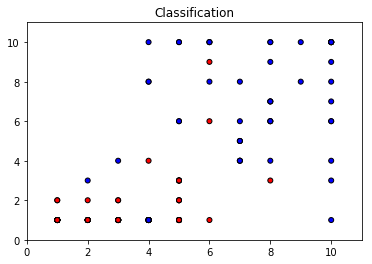

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=25)
plt.xlim(0,11)
plt.ylim(0,11)
plt.title("Classification")
plt.show()